### KNN - K Nearest Neighbours Modeli

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# outcome 1 = şeker hastası
# outcome 0= sağlıklı

seker_hastalari=data[data.Outcome==1]
saglikli_insanlar=data[data.Outcome==0]

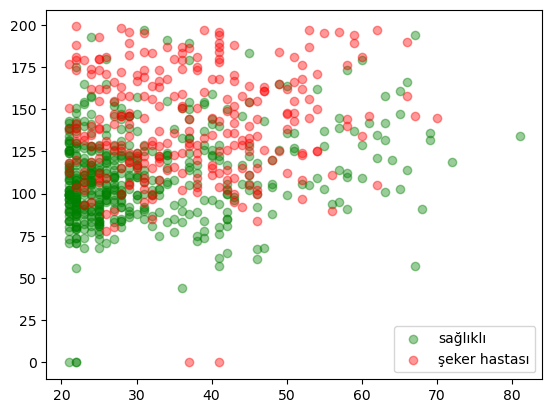

In [12]:
plt.scatter(saglikli_insanlar.Age,saglikli_insanlar.Glucose,color="green",label="sağlıklı",alpha=0.4)
plt.scatter(seker_hastalari.Age,seker_hastalari.Glucose,color="red",label="şeker hastası",alpha=0.4)
plt.xlabel=("Age")
plt.ylabel=("Glucose")
plt.legend()

In [15]:
y=data.Outcome.values
x_ham_veri=data.drop(["Outcome"],axis=1)

In [20]:
x=(x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))
# normalizyon yapmanın temel nedeni doğru ölçüm yapabilmek

In [21]:
# normalizasyon öncesi
print(x_ham_veri)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
#normalizasyon sonrası veri
print(x)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.007092  0.174941       0.085106       0.041371  0.000000  0.039716   
1       0.001182  0.100473       0.078014       0.034279  0.000000  0.031442   
2       0.009456  0.216312       0.075650       0.000000  0.000000  0.027541   
3       0.001182  0.105201       0.078014       0.027187  0.111111  0.033215   
4       0.000000  0.161939       0.047281       0.041371  0.198582  0.050946   
..           ...       ...            ...            ...       ...       ...   
763     0.011820  0.119385       0.089835       0.056738  0.212766  0.038889   
764     0.002364  0.144208       0.082742       0.031915  0.000000  0.043499   
765     0.005910  0.143026       0.085106       0.027187  0.132388  0.030969   
766     0.001182  0.148936       0.070922       0.000000  0.000000  0.035579   
767     0.001182  0.109929       0.082742       0.036643  0.000000  0.035934   

     DiabetesPedigreeFunction       Age

In [22]:
# train datamız ile test datamızı ayırıyoruz
#train datamız sistemin sağlıklı insan ile hasta insanı ayırt edebiliyor mu diye test etmek için kullanılacak
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2 , random_state=1)


In [24]:
#knn modeli

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("K=3 için Test verilerinin doğurlama testi sonucu = " ,knn.score(x_test,y_test))

K=3 için Test verilerinin doğurlama testi sonucu =  0.7402597402597403


In [25]:
# k için en iyi değer 

sayac=1
for k in range(1,11):
    knn_yeni=KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train,y_train)
    print(sayac," ","Doğruluk oranı : % ",knn_yeni.score(x_test,y_test)*100)
    sayac+=1

1   Doğruluk oranı : %  72.07792207792207
2   Doğruluk oranı : %  72.72727272727273
3   Doğruluk oranı : %  74.02597402597402
4   Doğruluk oranı : %  72.07792207792207
5   Doğruluk oranı : %  73.37662337662337
6   Doğruluk oranı : %  77.27272727272727
7   Doğruluk oranı : %  75.97402597402598
8   Doğruluk oranı : %  76.62337662337663
9   Doğruluk oranı : %  76.62337662337663
10   Doğruluk oranı : %  75.97402597402598
